In [1]:
import sys

sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from volatility import Panel_MIDAS
import pandas as pd
import numpy as np
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [153]:
model = Panel_MIDAS()

In [134]:
X, y, tau = model.simulate(panel = 20)

In [135]:
model.fit(['', '', 'pos'], X, y)

Loglikelihood:  27.779034981501432 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    0.099926        0.015423      0.069697       0.130154
1    0.299326        0.007257      0.285102       0.313549
2    4.016981        3.837493     -3.504368      11.538329


In [164]:
pm100 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/panel_midas_100.csv')
pm200 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/panel_midas_200.csv')
pm500 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/panel_midas_500.csv')

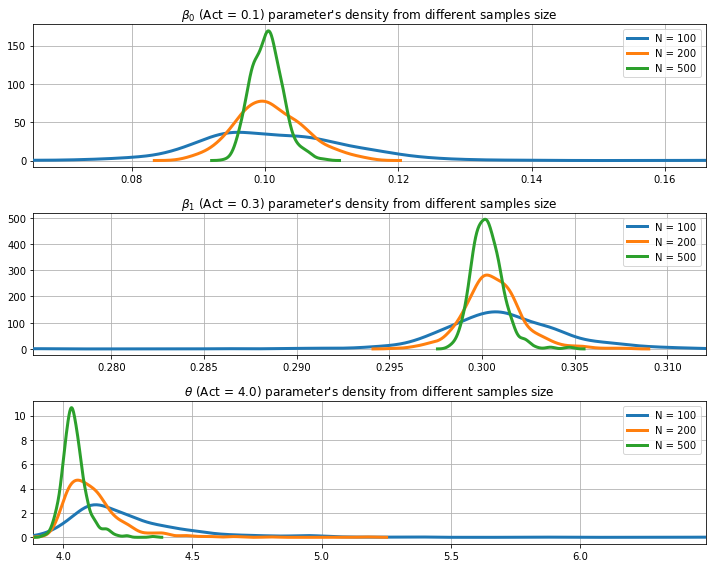

In [165]:
beta0_100 = sm.nonparametric.KDEUnivariate(pm100.iloc[:, 2].values)
beta0_100.fit()
beta0_200 = sm.nonparametric.KDEUnivariate(pm200.iloc[:, 2].values)
beta0_200.fit()
beta0_500 = sm.nonparametric.KDEUnivariate(pm500.iloc[:, 2].values)
beta0_500.fit()


beta1_100 = sm.nonparametric.KDEUnivariate(pm100.iloc[:, 3].values)
beta1_100.fit()
beta1_200 = sm.nonparametric.KDEUnivariate(pm200.iloc[:, 3].values)
beta1_200.fit()
beta1_500 = sm.nonparametric.KDEUnivariate(pm500.iloc[:, 3].values)
beta1_500.fit()

theta_100 = sm.nonparametric.KDEUnivariate(pm100.iloc[:, 4].values)
theta_100.fit()
theta_200 = sm.nonparametric.KDEUnivariate(pm200.iloc[:, 4].values)
theta_200.fit()
theta_500 = sm.nonparametric.KDEUnivariate(pm500.iloc[:, 4].values)
theta_500.fit()


fig , ax = plt.subplots(3, 1, figsize=(10, 8), tight_layout=True)

ax[0].plot(beta0_100.support, beta0_100.density, lw = 3, label = 'N = 100', zorder = 10)
ax[0].plot(beta0_200.support, beta0_200.density, lw = 3, label = 'N = 200', zorder = 10)
ax[0].plot(beta0_500.support, beta0_500.density, lw = 3, label = 'N = 500', zorder = 10)
ax[0].set_title(r'$\beta_0$'+" (Act = 0.1) parameter's density from different samples size")
ax[0].grid(True, zorder = -5)
ax[0].set_xlim((np.min(pm100.iloc[:, 2].values), np.max(pm100.iloc[:, 2].values)))
ax[0].legend(loc = 'best')

ax[1].plot(beta1_100.support, beta1_100.density, lw = 3, label = 'N = 100', zorder = 10)
ax[1].plot(beta1_200.support, beta1_200.density, lw = 3, label = 'N = 200', zorder = 10)
ax[1].plot(beta1_500.support, beta1_500.density, lw = 3, label = 'N = 500', zorder = 10)
ax[1].set_title(r'$\beta_1$'+" (Act = 0.3) parameter's density from different samples size")
ax[1].grid(True, zorder = -5)
ax[1].set_xlim((np.min(pm100.iloc[:, 3].values), np.max(pm100.iloc[:, 3].values)))
ax[1].legend(loc = 'best')

ax[2].plot(theta_100.support, theta_100.density, lw = 3, label = 'N = 100', zorder = 10)
ax[2].plot(theta_200.support, theta_200.density, lw = 3, label = 'N = 200', zorder = 10)
ax[2].plot(theta_500.support, theta_500.density, lw = 3, label = 'N = 500', zorder = 10)
ax[2].set_title(r'$\theta$'+" (Act = 4.0) parameter's density from different samples size")
ax[2].grid(True, zorder = -5)
ax[2].set_xlim((np.min(pm100.iloc[:, 4].values), np.max(pm100.iloc[:, 4].values)))
ax[2].legend(loc = 'best')

plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/panelmidas_sim.png')
plt.show()